In [ ]:
!git clone https://github.com/SoosanEXE/FYP.git

Cloning into 'FYP'...
remote: Enumerating objects: 176, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 176 (delta 2), reused 8 (delta 2), pack-reused 168
Receiving objects: 100% (176/176), 102.96 MiB | 15.91 MiB/s, done.
Resolving deltas: 100% (78/78), done.
Checking out files: 100% (51/51), done.


In [ ]:
import pandas as pd
from FYP.DataSets import constants as paths
from FYP.DataPreprocess import constants
from FYP.DataPreprocess.BinaryClassMapping import BinMap, BinMap1
from FYP.DataPreprocess.Scaling import Scaling
from FYP.DataPreprocess.Encoding import Encoding
from FYP.DataPreprocess.FeatureSelection import FeatureSelection
from FYP.AnomalyClassifier.AnomalyClassifier import AnomalyClassifier_nsl, AnomalyClassifier_unsw
from FYP.EvalMetrics.EvalMetrics import EvalMetrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree
import joblib
import warnings
warnings.filterwarnings('ignore')

In [ ]:
clf=joblib.load('FYP/NSLAnoClf.pkl')

In [ ]:
df=pd.read_parquet('FYP/KDDpreprocessed.parquet')

In [ ]:
X=df.drop('attack_class',axis=1)
y=df['attack_class']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=50,shuffle=True)

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
roc_auc_score = cross_val_score(clf, X, y, cv=3, scoring='roc_auc')
print('roc_auc_score ', np.mean(roc_auc_score ),roc_auc_score )

roc_auc_score  0.9970902099066251 [0.99999793 0.99999323 0.99127947]


In [ ]:
 y_score1 = clf.predict_proba(X_test)[:,1]

In [ ]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)

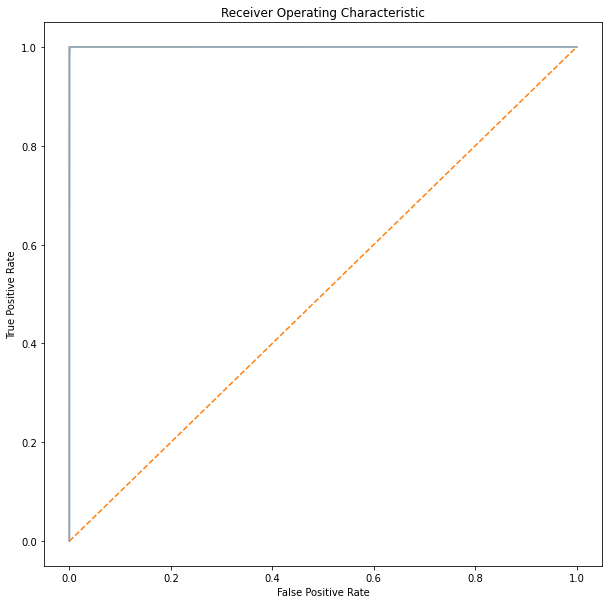

In [ ]:
#auc roc curve
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

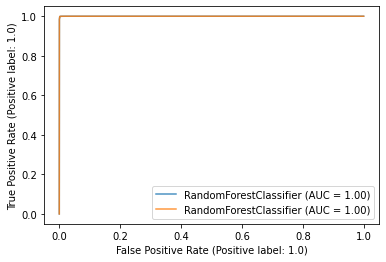

In [ ]:
#auc curve for rfc
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay
rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(X_train, y_train)
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test, ax=ax, alpha=0.8)
rfc_disp.plot(ax=ax, alpha=0.8)
plt.show()

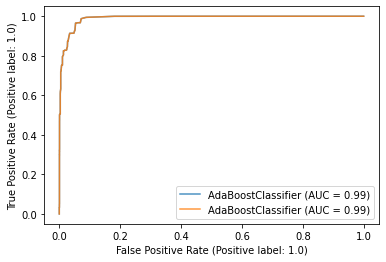

In [ ]:
#auc curve for ada
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import RocCurveDisplay
ada = AdaBoostClassifier(n_estimators=10, random_state=42)
ada.fit(X_train, y_train)
ax = plt.gca()
ada_disp = RocCurveDisplay.from_estimator(ada, X_test, y_test, ax=ax, alpha=0.8)
ada_disp.plot(ax=ax, alpha=0.8)
plt.show()

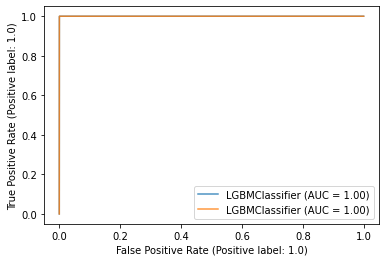

In [ ]:
#auc curve for lightgbm
import lightgbm
from sklearn.metrics import RocCurveDisplay
gbm = lightgbm.LGBMClassifier(objective='binary', n_estimators= 500, n_jobs=-1)
gbm.fit(X_train, y_train)
ax = plt.gca()
gbm_disp = RocCurveDisplay.from_estimator(gbm, X_test, y_test, ax=ax, alpha=0.8)
gbm_disp.plot(ax=ax, alpha=0.8)
plt.show()

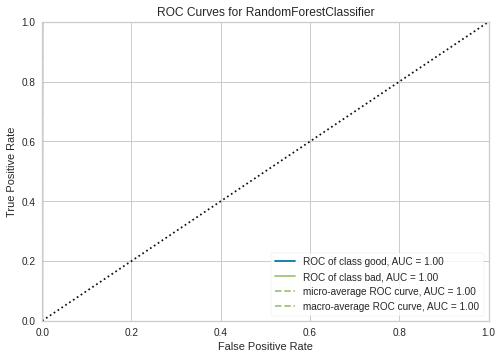

In [ ]:
from yellowbrick.classifier import ROCAUC
rf = RandomForestClassifier(n_estimators=500,random_state=2)
visualizer = ROCAUC(rf, classes=[ "good", "bad"])
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show() 

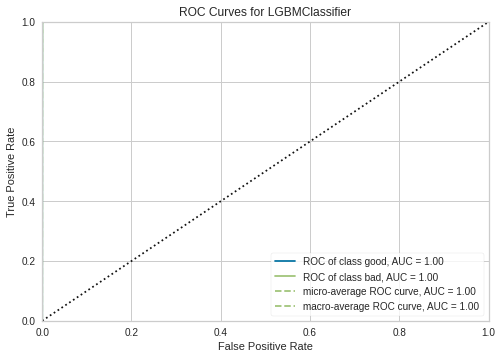

In [ ]:
import lightgbm
rf = lightgbm.LGBMClassifier(objective='binary', n_estimators= 500, n_jobs=-1)
visualizer = ROCAUC(rf, classes=[ "good", "bad"])
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show() 

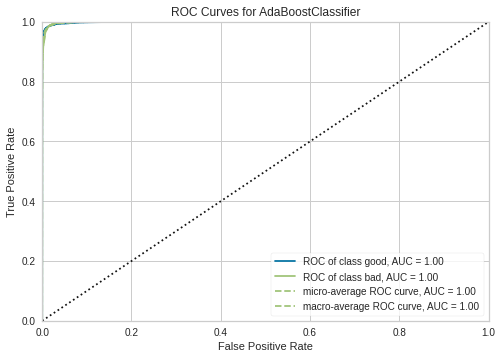

In [ ]:
from yellowbrick.classifier import ROCAUC
rf = AdaBoostClassifier(n_estimators=500,random_state=2)
visualizer = ROCAUC(rf, classes=[ "good", "bad"])
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show() 